# Capstone Project 2: Quora Question Pair

## Backgroud

### Quora is a helpful and popular website that serve millions people online. This project is designed to identify duplicate questions asked by users. It will help improve the searching accuracy. And also improve users’ experience by saving their time of waiting for answers. It is a great opportunity for me to practice my skills. I’m going to perform the NLP skills I learnt from our course, to build an algorithm to complete the task. Hopefully I can start processing the similar datasets in our company and make more contributions after going through this project under mentor’s guidance. 


In [38]:
# Import necessary modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
train = pd.read_csv('../quora-question-pairs/train_data/data/train.csv')
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


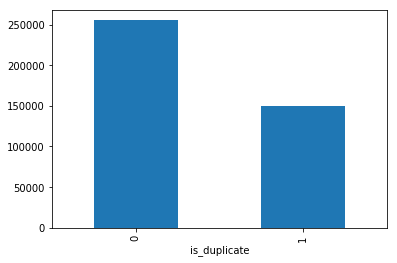

In [6]:
train.groupby("is_duplicate")['id'].count().plot.bar()

### The training data is unbalanced, but not highly unbalanced.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [28]:
test = pd.read_csv('../quora-question-pairs/train_data/data/test.csv')
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB


In [30]:
print(len(train), len(test))

404290 2345796


In [31]:
# Remove the punctuation and replace the abbreviation
punctuation='["\'?,\.]'
abbr_dict={
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",

    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is",
    "he's":"he is",
    "she's":"she is",
    "that's":"that is",
    "there's":"there is",
    "there're":"there are",

    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",

    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",

    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    punctuation:'',
    '\s+':' ', 
}

In [32]:
def process_data(file_name):
    data=pd.read_csv(file_name)
    data.question1=data.question1.str.lower() # conver to lower case
    data.question2=data.question2.str.lower()
    data.question1=data.question1.astype(str)
    data.question2=data.question2.astype(str)
    data.replace(abbr_dict,regex=True,inplace=True)
    display(data.head(2))
    return data

In [33]:
# Process training data
train_df=process_data('../quora-question-pairs/train_data/data/train.csv')

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0


In [34]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0


### Now let's do some EDA

Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780



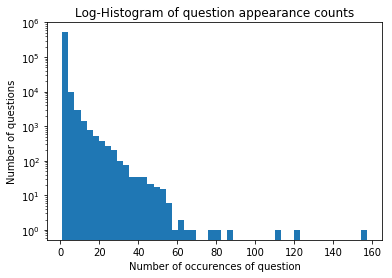

In [39]:
print('Total number of question pairs for training: {}'.format(len(train_df)))
print('Duplicate pairs: {}%'.format(round(train_df['is_duplicate'].mean()*100, 2)))
qids = pd.Series(train_df['qid1'].tolist() + train_df['qid2'].tolist())
print('Total number of questions in the training data: {}'.format(len(
    np.unique(qids))))
print('Number of questions that appear multiple times: {}'.format(np.sum(qids.value_counts() > 1)))

plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
print()

In [42]:
from sklearn.metrics import log_loss

p = train_df['is_duplicate'].mean() # Our predicted probability
print('Predicted score:', log_loss(train_df['is_duplicate'], np.zeros_like(train_df['is_duplicate']) + p))

test_df = pd.read_csv('../quora-question-pairs/train_data/data/test.csv')
sub = pd.DataFrame({'test_id': test_df['test_id'], 'is_duplicate': p})
sub.to_csv('naive_submission.csv', index=False)
sub.head()

Predicted score: 0.6585273839844354


,test_id,is_duplicate
0,0,0.369198
1,1,0.369198
2,2,0.369198
3,3,0.369198
4,4,0.369198


In [43]:
test_df=process_data('../quora-question-pairs/train_data/data/test.csv')

,test_id,question1,question2
0,0,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...
1,1,should i have a hair transplant at age 24 how ...,how much cost does hair transplant require


In [44]:
test_df.head()

,test_id,question1,question2
0,0,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...
1,1,should i have a hair transplant at age 24 how ...,how much cost does hair transplant require
2,2,what but is the best way to send money from ch...,what you send money to china
3,3,which food not emulsifiers,what foods fibre
4,4,how aberystwyth start reading,how their can i start reading


/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


mean-train 58.53 std-train 31.56 mean-test 58.75 std-test 31.21 max-train 1140.00 max-test 1145.00


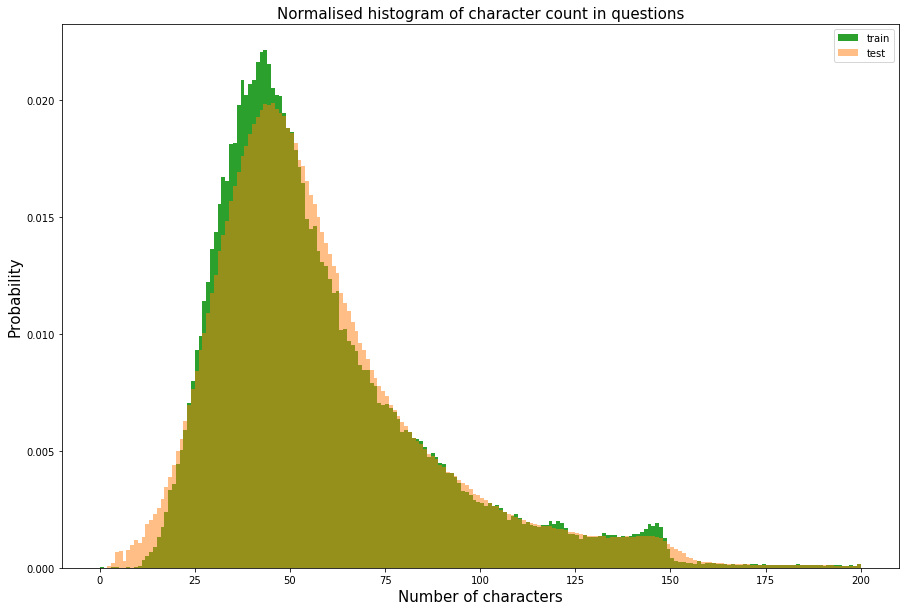

In [45]:
train_qs = pd.Series(train_df['question1'].tolist() + train_df['question2'].tolist()).astype(str)
test_qs = pd.Series(test_df['question1'].tolist() + test_df['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
pal = sns.color_palette()
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=200, range=[0, 200], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


mean-train 11.12 std-train 5.95 mean-test 11.08 std-test 5.89 max-train 248.00 max-test 249.00


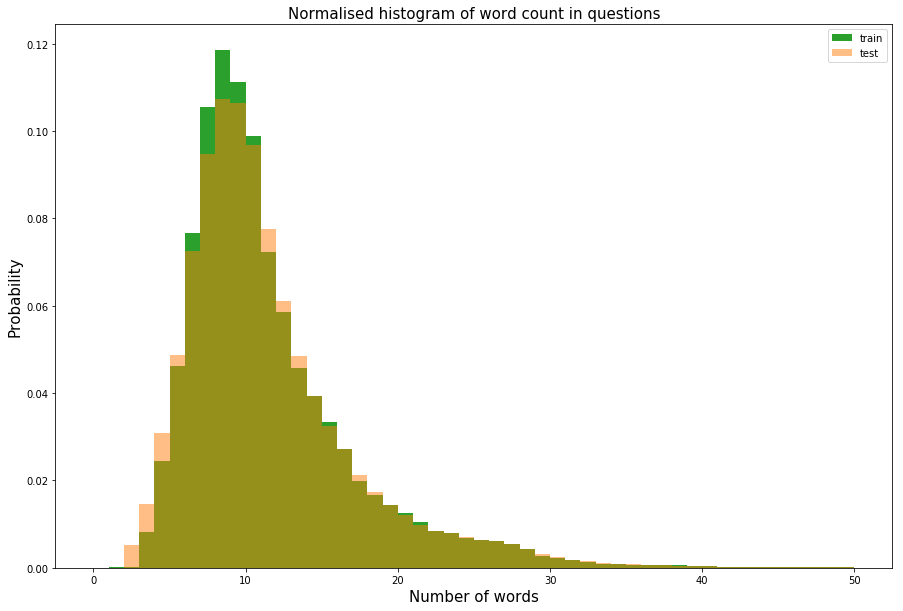

In [46]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[2], normed=True, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], normed=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(), 
                          dist_train.std(), dist_test.mean(), dist_test.std(), dist_train.max(), dist_test.max()))

/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'word_match_share')

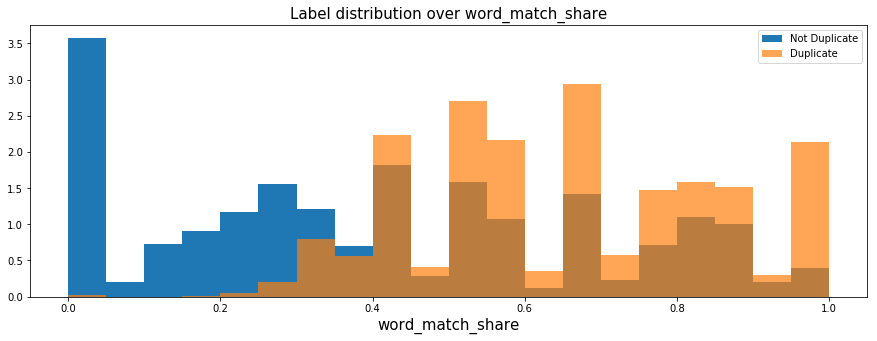

In [47]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R


train_word_match = train_df.apply(word_match_share, axis=1, raw=True)
plt.figure(figsize=(15, 5))
plt.hist(train_word_match[train_df['is_duplicate'] == 0], bins=20, normed=True, label='Not Duplicate')
plt.hist(train_word_match[train_df['is_duplicate'] == 1], bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [48]:
train_word_match.head()

0    0.909091
1    0.461538
2    0.363636
3    0.000000
4    0.266667
dtype: float64

In [49]:
from collections import Counter

# If a word appears only once, we ignore it completely (likely a typo)
# Epsilon defines a smoothing constant, which makes the effect of extremely rare words smaller
def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps = 5000 
words = (" ".join(train_qs)).lower().split()
counts = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [50]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\nLeast common words and weights: ')
(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5827980484377947e-06), ('what', 2.99644322189561e-06), ('is', 3.367740414568845e-06), ('i', 4.320176954448054e-06), ('how', 4.339110135293454e-06), ('a', 4.5315714583503264e-06), ('to', 4.6440131704213515e-06), ('in', 4.8556889251447e-06), ('do', 5.589496218705808e-06), ('of', 5.892821365013141e-06)]

Least common words and weights: 


[('シ', 9.998000399920016e-05),
 ('し', 9.998000399920016e-05),
 ('dcx3400', 9.998000399920016e-05),
 ('(employment', 9.998000399920016e-05),
 ('1-855-425-3768', 9.998000399920016e-05),
 ('confederates', 9.998000399920016e-05),
 ('asahi', 9.998000399920016e-05),
 ('fab', 9.998000399920016e-05),
 ('oitnb', 9.998000399920016e-05),
 ('samrudi', 9.998000399920016e-05)]

In [51]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row['question1']).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row['question2']).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        # The computer-generated chaff includes a few questions that are nothing but stopwords
        return 0
    
    shared_weights = [weights.get(w, 0) for w in q1words.keys() if w in q2words] + [weights.get(w, 0) for w in q2words.keys() if w in q1words]
    total_weights = [weights.get(w, 0) for w in q1words] + [weights.get(w, 0) for w in q2words]
    
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 0, 'word_match_share')

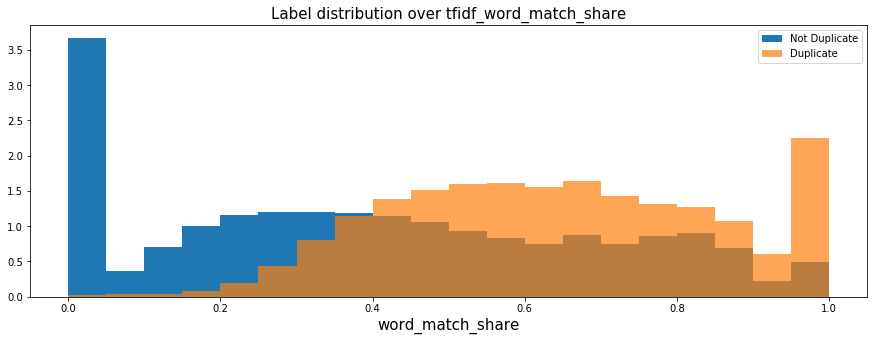

In [52]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = train_df.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[train_df['is_duplicate'] == 0].fillna(0), bins=20, normed=True, label='Not Duplicate')
plt.hist(tfidf_train_word_match[train_df['is_duplicate'] == 1].fillna(0), bins=20, normed=True, alpha=0.7, label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontsize=15)
plt.xlabel('word_match_share', fontsize=15)

In [53]:
from sklearn.metrics import roc_auc_score
print('Original AUC:', roc_auc_score(train_df['is_duplicate'], train_word_match))
print('   TFIDF AUC:', roc_auc_score(train_df['is_duplicate'], tfidf_train_word_match.fillna(0)))

Original AUC: 0.7508955253923354
   TFIDF AUC: 0.7392290125198782


In [54]:
# Rebalance data
x_train = pd.DataFrame()
x_test = pd.DataFrame()
x_train['word_match'] = train_word_match
x_train['tfidf_word_match'] = tfidf_train_word_match
x_test['word_match'] = test_df.apply(word_match_share, axis=1, raw=True)
x_test['tfidf_word_match'] = test_df.apply(tfidf_word_match_share, axis=1, raw=True)

y_train = train_df['is_duplicate'].values

/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars
/Users/xiangzhen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [55]:
pos_train = x_train[y_train == 1]
neg_train = x_train[y_train == 0]

# oversample the negative class
p = 0.165
scale = ((len(pos_train) / (len(pos_train) + len(neg_train))) / p) - 1
while scale > 1:
    neg_train = pd.concat([neg_train, neg_train])
    scale -=1
neg_train = pd.concat([neg_train, neg_train[:int(scale * len(neg_train))]])
print(len(pos_train) / (len(pos_train) + len(neg_train)))

x_train = pd.concat([pos_train, neg_train])
y_train = (np.zeros(len(pos_train)) + 1).tolist() + np.zeros(len(neg_train)).tolist()
del pos_train, neg_train

0.19124366100096607


### The original unbalanced data has been resampled, now let's set a baseline model.

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

In [58]:
import xgboost as xgb

# parameters
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-logloss:0.683546	valid-logloss:0.683888
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.608207	valid-logloss:0.608206
[20]	train-logloss:0.554817	valid-logloss:0.555339
[30]	train-logloss:0.515843	valid-logloss:0.516881
[40]	train-logloss:0.487089	valid-logloss:0.488445
[50]	train-logloss:0.465431	valid-logloss:0.467075
[60]	train-logloss:0.448935	valid-logloss:0.450841
[70]	train-logloss:0.436308	valid-logloss:0.43847
[80]	train-logloss:0.426767	valid-logloss:0.42892
[90]	train-logloss:0.419351	valid-logloss:0.421463
[100]	train-logloss:0.413414	valid-logloss:0.415694
[110]	train-logloss:0.408509	valid-logloss:0.411126
[120]	train-logloss:0.405086	valid-logloss:0.407484
[130]	train-logloss:0.402349	valid-logloss:0.404795
[140]	train-logloss:0.399985	valid-logloss:0.402555
[150]	train-logloss:0.398205	valid-logloss:0.400771
[160]	train-logloss:0.396643	v

In [59]:
d_test = xgb.DMatrix(x_test)
p_test = bst.predict(d_test)

sub = pd.DataFrame()
sub['test_id'] = test_df['test_id']
sub['is_duplicate'] = p_test
sub.to_csv('result_xgb.csv', index=False)

### The log_loss of this prediction is 0.38526. Although we already saw its performance in the training process, it was just my baseline model. 

### I will try to explore more and generate more features. Perhaps I will use more advanced algorithm to complete this project.